<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDS0321ENSkillsNetwork26802033-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **SpaceX  Falcon 9 First Stage Landing Prediction**


## Assignment: Exploring and Preparing Data


Estimated time needed: **70** minutes


In this assignment, we will predict if the Falcon 9 first stage will land successfully. SpaceX advertises Falcon 9 rocket launches on its website with a cost of 62 million dollars; other providers cost upward of 165 million dollars each, much of the savings is due to the fact that SpaceX can reuse the first stage.

In this lab, you will perform Exploratory Data Analysis and Feature Engineering.


Falcon 9 first stage will land successfully


![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/Images/landing_1.gif)


Several examples of an unsuccessful landing are shown here:


![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/Images/crash.gif)


Most unsuccessful landings are planned. Space X performs a controlled landing in the oceans.


## Objectives

Perform exploratory Data Analysis and Feature Engineering using `Pandas` and `Matplotlib`

*   Exploratory Data Analysis
*   Preparing Data  Feature Engineering


### Import Libraries and Define Auxiliary Functions


We will import the following libraries the lab


In [1]:
import piplite
await piplite.install(['numpy'])
await piplite.install(['pandas'])
await piplite.install(['seaborn'])

In [2]:
# pandas is a software library written for the Python programming language for data manipulation and analysis.
import pandas as pd
#NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays
import numpy as np
# Matplotlib is a plotting library for python and pyplot gives us a MatLab like plotting framework. We will use this in our plotter function to plot data.
import matplotlib.pyplot as plt
#Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics
import seaborn as sns

In [3]:
## Exploratory Data Analysis


First, let's read the SpaceX dataset into a Pandas dataframe and print its summary


In [4]:
from js import fetch
import io

URL = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv"
resp = await fetch(URL)
dataset_part_2_csv = io.BytesIO((await resp.arrayBuffer()).to_py())
df=pd.read_csv(dataset_part_2_csv)
df.head(50)

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0
5,6,2014-01-06,Falcon 9,3325.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1005,-80.577366,28.561857,0
6,7,2014-04-18,Falcon 9,2296.000000,ISS,CCAFS SLC 40,True Ocean,1,False,False,True,NaN,1.0,0,B1006,-80.577366,28.561857,1
7,8,2014-07-14,Falcon 9,1316.000000,LEO,CCAFS SLC 40,True Ocean,1,False,False,True,NaN,1.0,0,B1007,-80.577366,28.561857,1
8,9,2014-08-05,Falcon 9,4535.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1008,-80.577366,28.561857,0
9,10,2014-09-07,Falcon 9,4428.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1011,-80.577366,28.561857,0


First, let's try to see how the `FlightNumber` (indicating the continuous launch attempts.) and `Payload` variables would affect the launch outcome.

We can plot out the <code>FlightNumber</code> vs. <code>PayloadMass</code>and overlay the outcome of the launch. We see that as the flight number increases, the first stage is more likely to land successfully. The payload mass is also important; it seems the more massive the payload, the less likely the first stage will return.


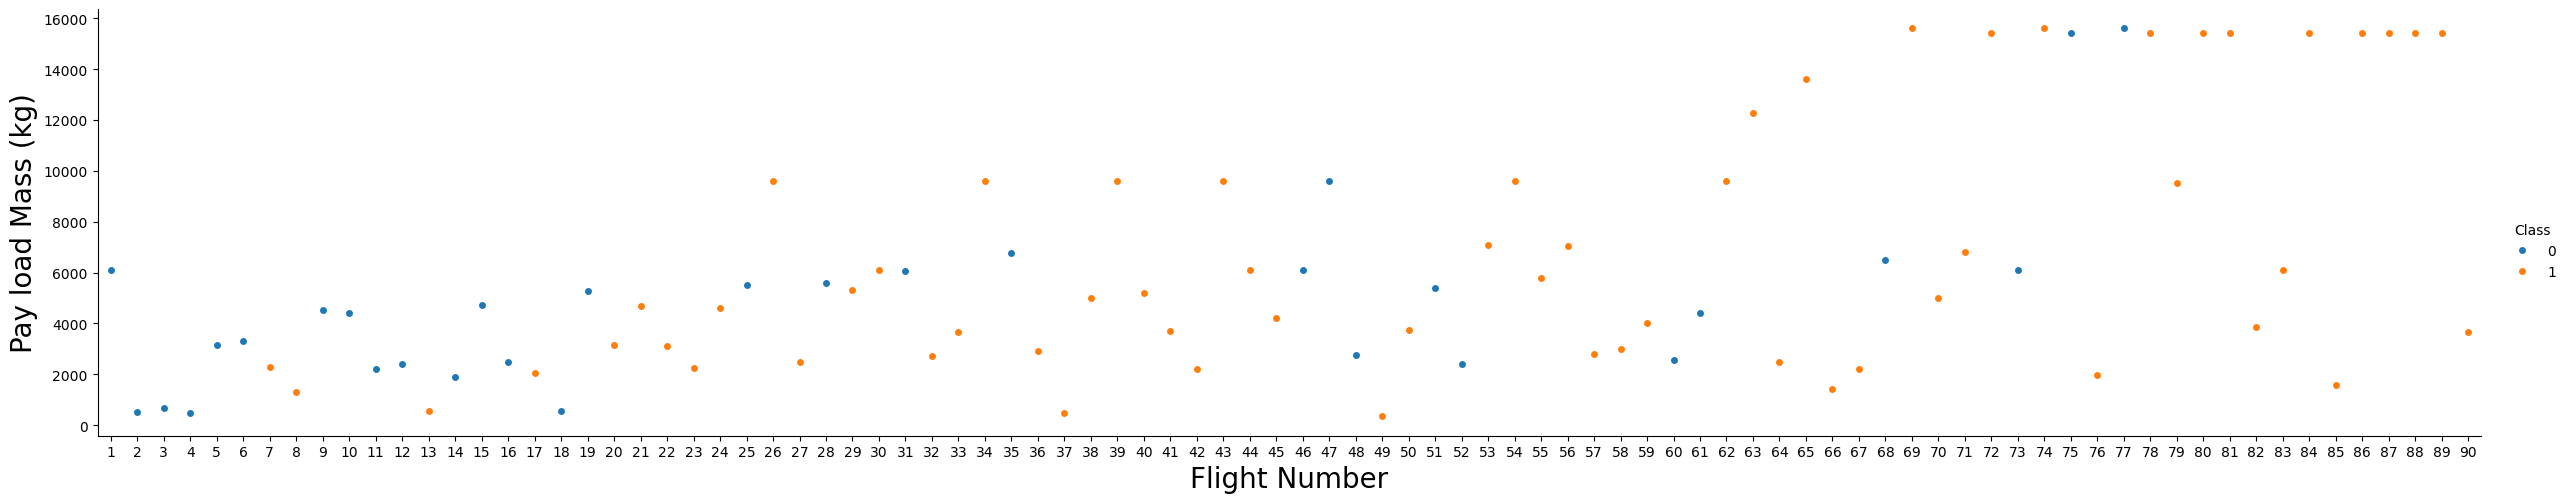

In [5]:
sns.catplot(y="PayloadMass", x="FlightNumber", hue="Class", data=df, aspect = 5)
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("Pay load Mass (kg)",fontsize=20)
plt.show()

We see that different launch sites have different success rates.  <code>CCAFS LC-40</code>, has a success rate of 60 %, while  <code>KSC LC-39A</code> and <code>VAFB SLC 4E</code> has a success rate of 77%.


Next, let's drill down to each site visualize its detailed launch records.


<Figure size 1000x600 with 0 Axes>

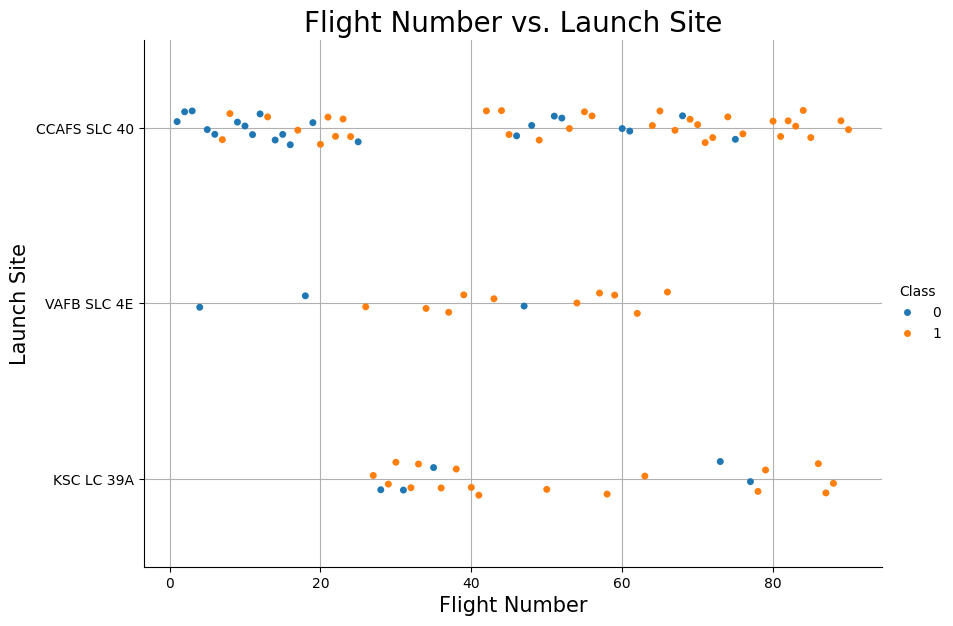

In [42]:
### TASK 1: Visualize the relationship between Flight Number and Launch Site

# Define the figure size
plt.figure(figsize=(10, 6))

# Use catplot correctly and remove the conflicting plt.figure()
sns.catplot(x="FlightNumber", y="LaunchSite", hue="Class", data=df, kind="strip", palette="tab10", height=6, aspect=1.5)

# Set the labels and title
plt.title("Flight Number vs. Launch Site", fontsize=20)
plt.xlabel("Flight Number", fontsize=15)
plt.ylabel("Launch Site", fontsize=15)

# Remove the grid parameter as it's not compatible with sns.catplot
plt.grid(True)

# Show the plot
plt.show()


Use the function <code>catplot</code> to plot <code>FlightNumber</code> vs <code>LaunchSite</code>, set the  parameter <code>x</code>  parameter to <code>FlightNumber</code>,set the  <code>y</code> to <code>Launch Site</code> and set the parameter <code>hue</code> to <code>'class'</code>


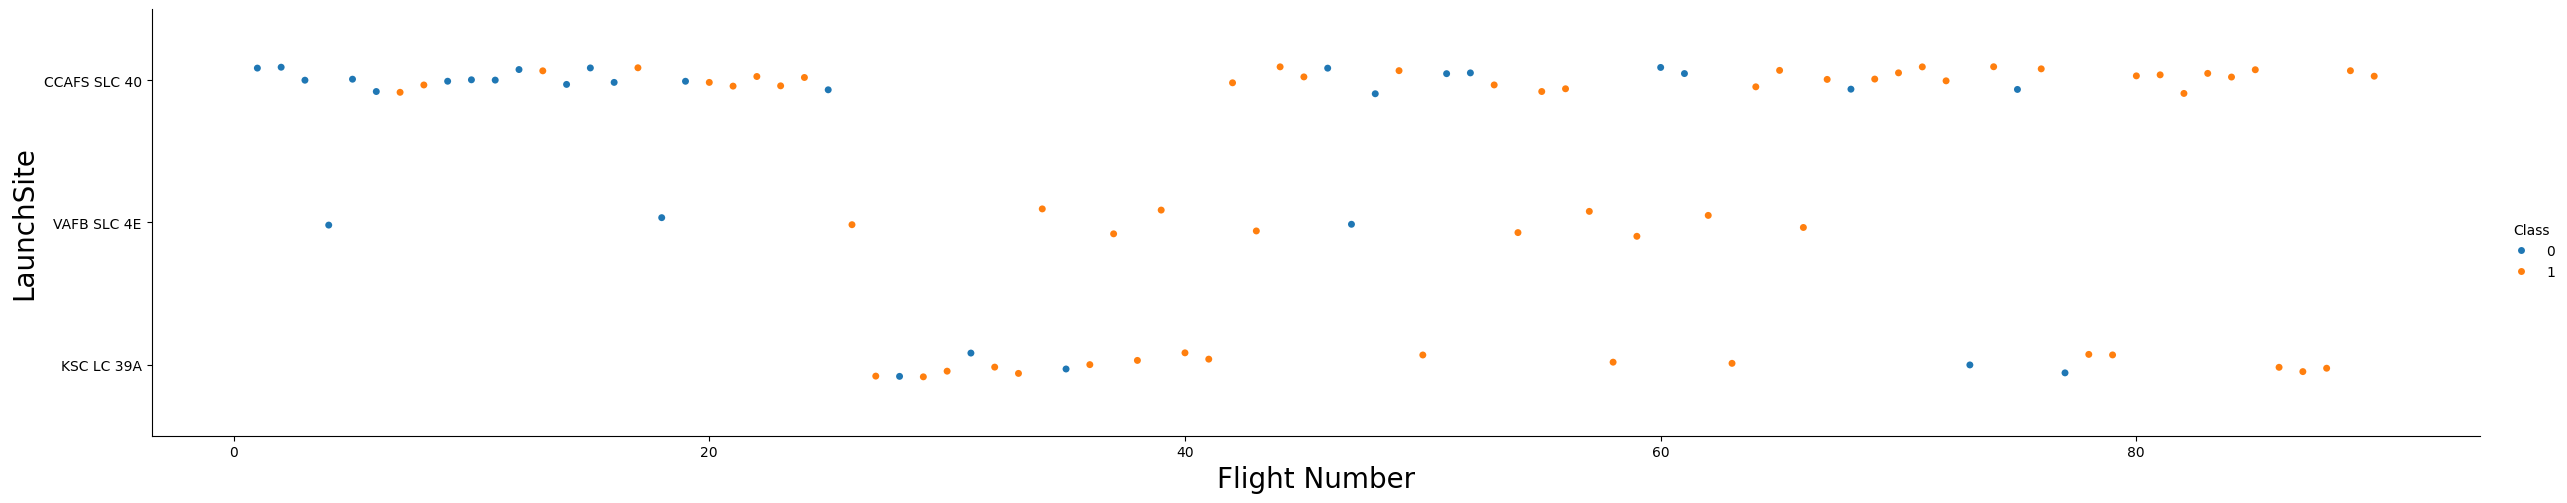

In [7]:
# Plot a scatter point chart with x axis to be Flight Number and y axis to be the launch site, and hue to be the class value
sns.catplot(y="LaunchSite", x="FlightNumber", hue="Class", data=df, aspect = 5)
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("LaunchSite",fontsize=20)
plt.show()

Now try to explain the patterns you found in the Flight Number vs. Launch Site scatter point plots.


<Figure size 1000x600 with 0 Axes>

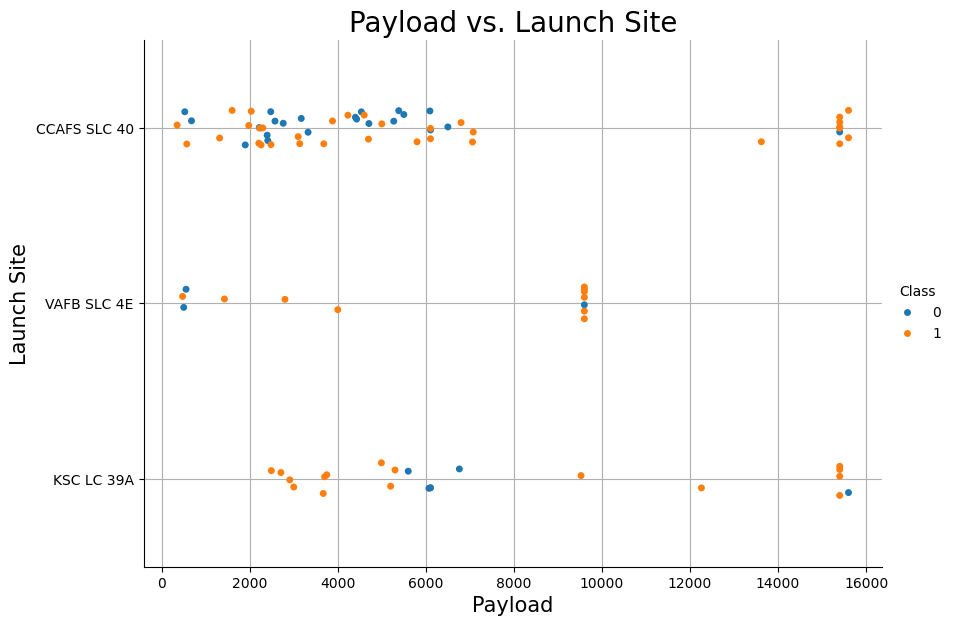

In [43]:
### TASK 2: Visualize the relationship between Payload and Launch Site
plt.figure(figsize=(10, 6))


sns.catplot(x="PayloadMass", y="LaunchSite", hue="Class", data=df, kind="strip", palette="tab10", height=6, aspect=1.5)

# Set the labels and title
plt.title("Payload vs. Launch Site", fontsize=20)
plt.xlabel("Payload", fontsize=15)
plt.ylabel("Launch Site", fontsize=15)

# Remove the grid parameter as it's not compatible with sns.catplot
plt.grid(True)

# Show the plot
plt.show()


We also want to observe if there is any relationship between launch sites and their payload mass.


<Figure size 1000x600 with 0 Axes>

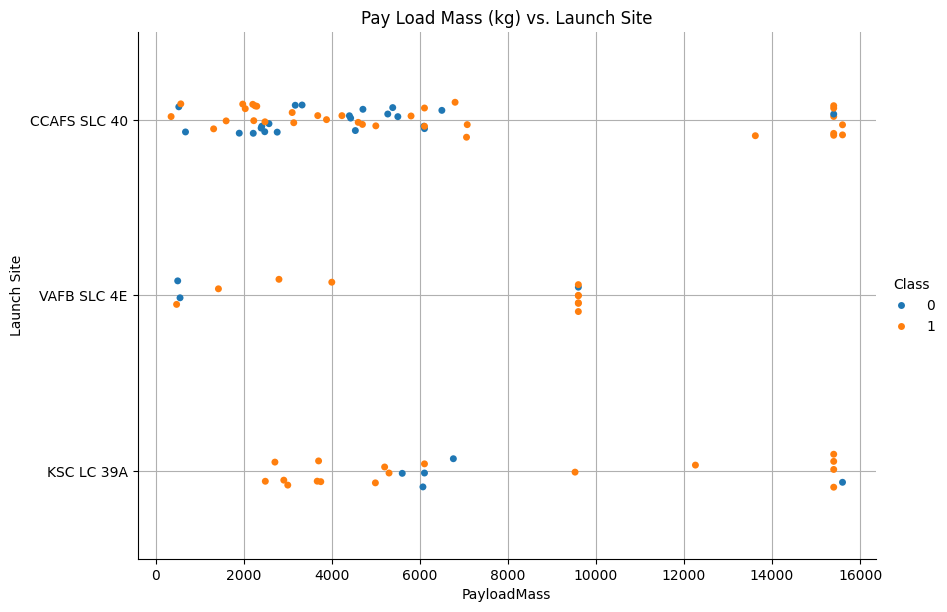

In [39]:
# Plot a scatter point chart with x axis to be Pay Load Mass (kg) and y axis to be the launch site, and hue to be the class value

plt.figure(figsize=(10, 6))
sns.catplot(x="PayloadMass", y="LaunchSite", hue="Class", data=df, kind="strip", palette="tab10", height=6, aspect=1.5)

plt.title("Pay Load Mass (kg) vs. Launch Site")
plt.xlabel("PayloadMass")
plt.ylabel("Launch Site")
#plt.legend(title="Launch Site")
plt.grid(True)
plt.show()

Now if you observe Payload Vs. Launch Site scatter point chart you will find for the VAFB-SLC  launchsite there are no  rockets  launched for  heavypayload mass(greater than 10000).


<ipython-input-10-21703525107b>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Orbit', y='Success', data=success_rates, palette='viridis')


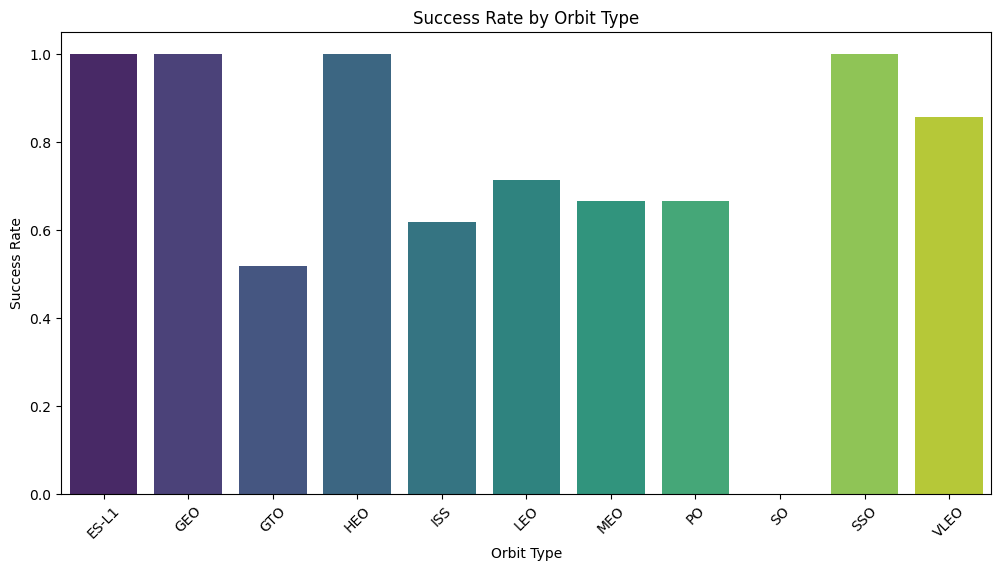

In [10]:
### TASK  3: Visualize the relationship between success rate of each orbit type
# Define a successful outcome
df['Success'] = df['Outcome'].apply(lambda x: 'True' in x)

# Calculate success rates for each orbit
success_rates = df.groupby('Orbit')['Success'].mean().reset_index()

# Plot the success rates
plt.figure(figsize=(12, 6))
sns.barplot(x='Orbit', y='Success', data=success_rates, palette='viridis')
plt.title('Success Rate by Orbit Type')
plt.xlabel('Orbit Type')
plt.ylabel('Success Rate')
plt.xticks(rotation=45)
plt.show()

In [11]:
df.head(5)

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class,Success
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0,False
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0,False
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0,False
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0,False
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0,False


Next, we want to visually check if there are any relationship between success rate and orbit type.


Let's create a `bar chart` for the sucess rate of each orbit


<ipython-input-12-506895ed171d>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Orbit', y='Success', data=success_rates, palette='viridis')


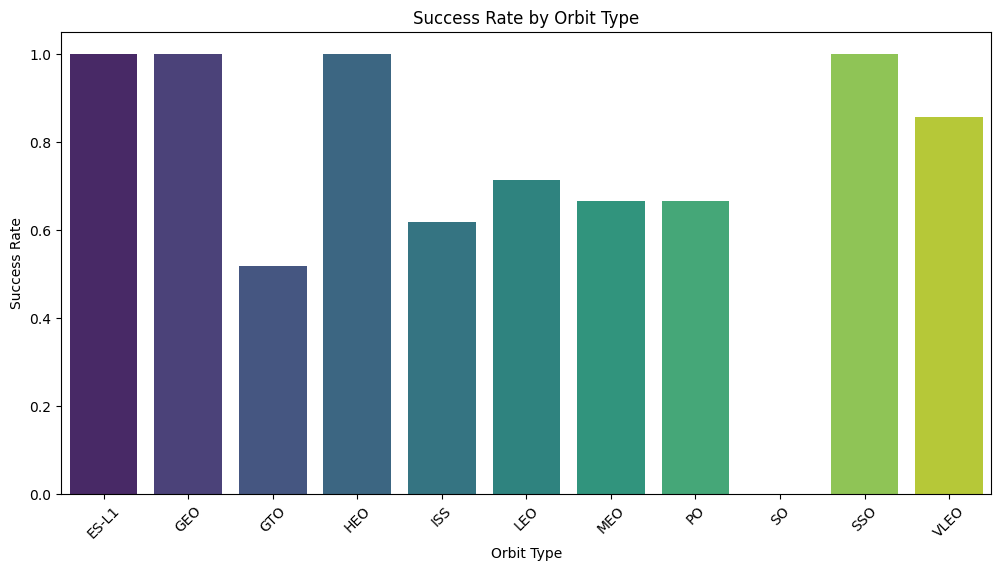

In [12]:
# HINT use groupby method on Orbit column and get the mean of Class column

df['Success'] = df['Outcome'].apply(lambda x: 'True' in x)

# Calculate success rates for each orbit
success_rates = df.groupby('Orbit')['Success'].mean().reset_index()

# Plot the success rates
plt.figure(figsize=(12, 6))
sns.barplot(x='Orbit', y='Success', data=success_rates, palette='viridis')
plt.title('Success Rate by Orbit Type')
plt.xlabel('Orbit Type')
plt.ylabel('Success Rate')
plt.xticks(rotation=45)
plt.show()



In [13]:
success_rates

,Orbit,Success
0,ES-L1,1.000000
1,GEO,1.000000
2,GTO,0.518519
3,HEO,1.000000
4,ISS,0.619048
5,LEO,0.714286
6,MEO,0.666667
7,PO,0.666667
8,SO,0.000000
9,SSO,1.000000


Analyze the ploted bar chart try to find which orbits have high sucess rate.


In [14]:
### TASK  4: Visualize the relationship between FlightNumber and Orbit type


For each orbit, we want to see if there is any relationship between FlightNumber and Orbit type.


<Figure size 1000x600 with 0 Axes>

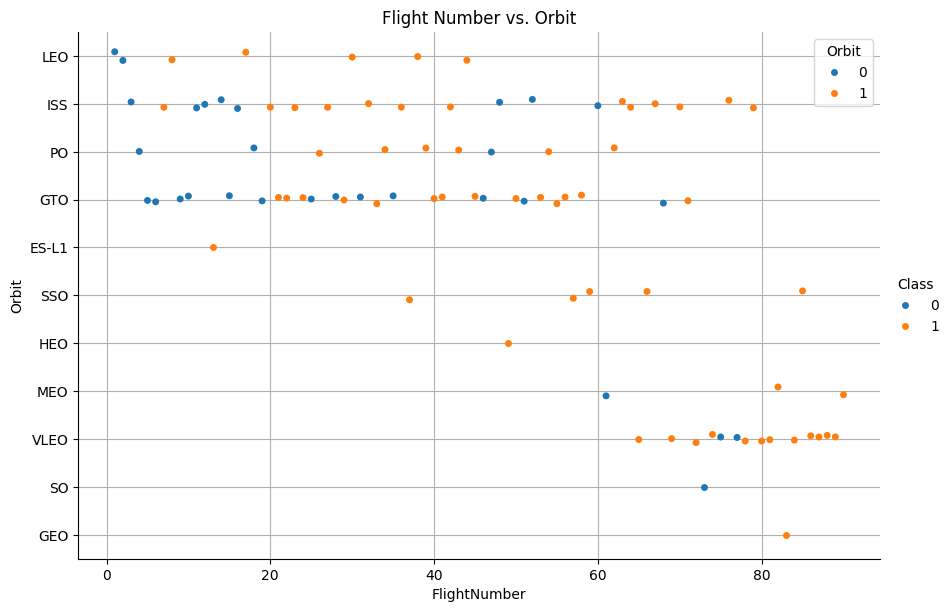

In [40]:
# Plot a scatter point chart with x axis to be FlightNumber and y axis to be the Orbit, and hue to be the class value


plt.figure(figsize=(10, 6))
sns.catplot(x="FlightNumber", y="Orbit", hue="Class", data=df, kind="strip", palette="tab10", height=6, aspect=1.5)

plt.title("Flight Number vs. Orbit")
plt.xlabel("FlightNumber")
plt.ylabel("Orbit")
plt.legend(title="Orbit")
plt.grid(True)
plt.show()



You should see that in the LEO orbit the Success appears related to the number of flights; on the other hand, there seems to be no relationship between flight number when in GTO orbit.


In [16]:
### TASK  5: Visualize the relationship between Payload and Orbit type


Similarly, we can plot the Payload vs. Orbit scatter point charts to reveal the relationship between Payload and Orbit type


<Figure size 1000x600 with 0 Axes>

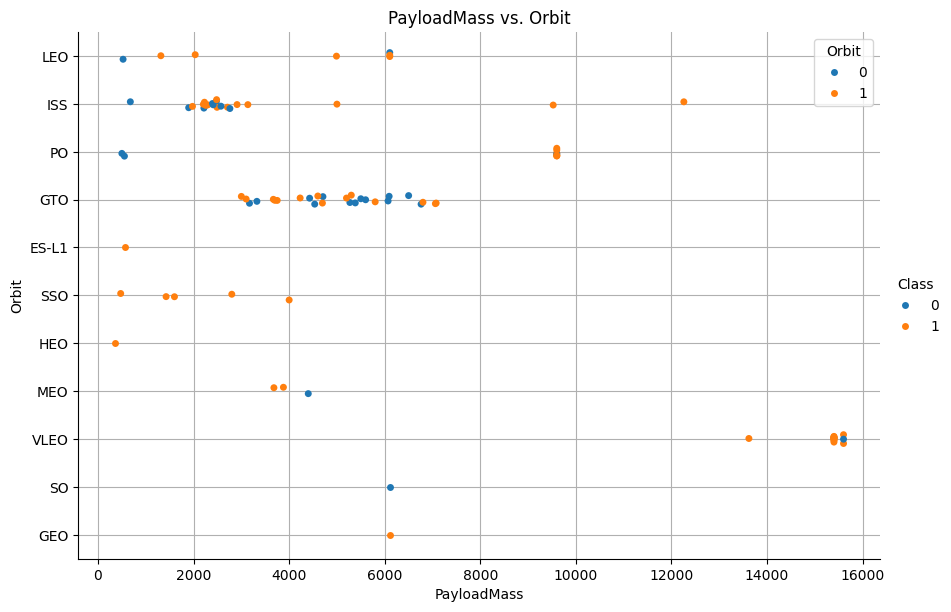

In [41]:
# Plot a scatter point chart with x axis to be Payload and y axis to be the Orbit, and hue to be the class value

plt.figure(figsize=(10, 6))
sns.catplot(x="PayloadMass", y="Orbit", hue="Class", data=df, kind="strip", palette="tab10", height=6, aspect=1.5)
plt.title("PayloadMass vs. Orbit")
plt.xlabel("PayloadMass")
plt.ylabel("Orbit")
plt.legend(title="Orbit")
plt.grid(True)
plt.show()



With heavy payloads the successful landing or positive landing rate are more for Polar,LEO and ISS.

However for GTO we cannot distinguish this well as both positive landing rate and negative landing(unsuccessful mission) are both there here.


In [18]:
### TASK  6: Visualize the launch success yearly trend


You can plot a line chart with x axis to be <code>Year</code> and y axis to be average success rate, to get the average launch success trend.


The function will help you get the year from the date:


In [19]:
# A function to Extract years from the date 
year=[]
def Extract_year():
    for i in df["Date"]:
        year.append(i.split("-")[0])
    return year
Extract_year()
df['Date'] = year
df.head()
    

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class,Success
0,1,2010,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0,False
1,2,2012,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0,False
2,3,2013,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0,False
3,4,2013,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0,False
4,5,2013,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0,False


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


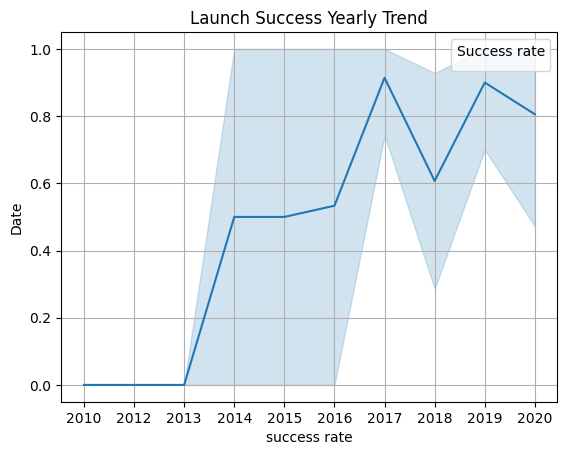

In [20]:
# Plot a line chart with x axis to be the extracted year and y axis to be the success rate

success_rates = df.groupby(['Orbit',"Date"])['Success'].mean().reset_index()

success_rates.sort_values(by=['Date'], ascending=True, inplace=True)

sns.lineplot(data=success_rates, x="Date", y="Success", )

plt.title("Launch Success Yearly Trend")
plt.xlabel("success rate")
plt.ylabel("Date")
plt.legend(title="Success rate")
plt.grid(True)
plt.show()


In [21]:
success_rates

,Orbit,Date,Success
18,LEO,2010,0.000000
19,LEO,2012,0.000000
26,PO,2013,0.000000
2,GTO,2013,0.000000
10,ISS,2013,0.000000
3,GTO,2014,0.000000
20,LEO,2014,1.000000
11,ISS,2014,0.500000
21,LEO,2015,1.000000
12,ISS,2015,0.000000


you can observe that the sucess rate since 2013 kept increasing till 2020


In [22]:
## Features Engineering


By now, you should obtain some preliminary insights about how each important variable would affect the success rate, we will select the features that will be used in success prediction in the future module.


In [23]:
features = df[['FlightNumber', 'PayloadMass', 'Orbit', 'LaunchSite', 'Flights', 'GridFins', 'Reused', 'Legs', 'LandingPad', 'Block', 'ReusedCount', 'Serial']]
features.head()

,FlightNumber,PayloadMass,Orbit,LaunchSite,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial
0,1,6104.959412,LEO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0003
1,2,525.000000,LEO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0005
2,3,677.000000,ISS,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0007
3,4,500.000000,PO,VAFB SLC 4E,1,False,False,False,NaN,1.0,0,B1003
4,5,3170.000000,GTO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B1004


In [24]:
### TASK  7: Create dummy variables to categorical columns


Use the function <code>get_dummies</code> and <code>features</code> dataframe to apply OneHotEncoder to the column <code>Orbits</code>, <code>LaunchSite</code>, <code>LandingPad</code>, and <code>Serial</code>. Assign the value to the variable <code>features_one_hot</code>, display the results using the method head. Your result dataframe must include all features including the encoded ones.


In [25]:
# HINT: Use get_dummies() function on the categorical columns

columns_to_encode = ['Orbit', 'LaunchSite', 'LandingPad', 'Serial']

# Apply one-hot encoding using get_dummies
features_one_hot = pd.get_dummies(features, columns=columns_to_encode)

# Display the results using the head method
print(features_one_hot)

    FlightNumber   PayloadMass  Flights  GridFins  Reused   Legs  Block  \
0              1   6104.959412        1     False   False  False    1.0   
1              2    525.000000        1     False   False  False    1.0   
2              3    677.000000        1     False   False  False    1.0   
3              4    500.000000        1     False   False  False    1.0   
4              5   3170.000000        1     False   False  False    1.0   
..           ...           ...      ...       ...     ...    ...    ...   
85            86  15400.000000        2      True    True   True    5.0   
86            87  15400.000000        3      True    True   True    5.0   
87            88  15400.000000        6      True    True   True    5.0   
88            89  15400.000000        3      True    True   True    5.0   
89            90   3681.000000        1      True   False   True    5.0   

    ReusedCount  Orbit_ES-L1  Orbit_GEO  ...  Serial_B1048  Serial_B1049  \
0             0        

In [26]:
### TASK  8: Cast all numeric columns to `float64`


Now that our <code>features_one_hot</code> dataframe only contains numbers cast the entire dataframe to variable type <code>float64</code>


In [27]:
# HINT: use astype function

numeric_columns = features_one_hot.select_dtypes(include=['int64', 'float64']).columns
features_one_hot[numeric_columns] = features_one_hot[numeric_columns].astype('float64')

# Display the results using the head method
print(features_one_hot.head())

# Verify the data types
print(features_one_hot.dtypes)

   FlightNumber  PayloadMass  Flights  GridFins  Reused   Legs  Block  \
0           1.0  6104.959412      1.0     False   False  False    1.0   
1           2.0   525.000000      1.0     False   False  False    1.0   
2           3.0   677.000000      1.0     False   False  False    1.0   
3           4.0   500.000000      1.0     False   False  False    1.0   
4           5.0  3170.000000      1.0     False   False  False    1.0   

   ReusedCount  Orbit_ES-L1  Orbit_GEO  ...  Serial_B1048  Serial_B1049  \
0          0.0            0          0  ...             0             0   
1          0.0            0          0  ...             0             0   
2          0.0            0          0  ...             0             0   
3          0.0            0          0  ...             0             0   
4          0.0            0          0  ...             0             0   

   Serial_B1050  Serial_B1051  Serial_B1054  Serial_B1056  Serial_B1058  \
0             0             0      

We can now export it to a <b>CSV</b> for the next section,but to make the answers consistent, in the next lab we will provide data in a pre-selected date range.


<code>features_one_hot.to_csv('dataset_part\_3.csv', index=False)</code>


In [28]:
features_one_hot.to_csv("C:\\Users\\sinan\\Documents", index=False)

print("DataFrame exported to 'features_one_hot.csv'")

DataFrame exported to 'features_one_hot.csv'


In [29]:
features_one_hot.to_csv('dataset_part_3.csv', index=False)

print("DataFrame exported to 'features_one_hot.csv'")

DataFrame exported to 'features_one_hot.csv'


In [30]:
import os

# Define the correct file path using raw string for Windows paths
file_path = r'C:\Users\sinan\Documents\Data Science Project\projects'

try:
    features_one_hot.to_cvs(file_path, index=False)
    print(f"DataFrame exported to '{file_path}'")
except Exception as e:
    print(f"Error exporting DataFrame: {e}")

# Check if the file exists after export
if os.path.exists(file_path):
    print(f"File '{file_path}' exists.")
else:
    print(f"File '{file_path}' does not exist.")



Error exporting DataFrame: 'DataFrame' object has no attribute 'to_cvs'
File 'C:\Users\sinan\Documents\Data Science Project\projects' exists.


In [31]:
print(features_one_hot.head())

   FlightNumber  PayloadMass  Flights  GridFins  Reused   Legs  Block  \
0           1.0  6104.959412      1.0     False   False  False    1.0   
1           2.0   525.000000      1.0     False   False  False    1.0   
2           3.0   677.000000      1.0     False   False  False    1.0   
3           4.0   500.000000      1.0     False   False  False    1.0   
4           5.0  3170.000000      1.0     False   False  False    1.0   

   ReusedCount  Orbit_ES-L1  Orbit_GEO  ...  Serial_B1048  Serial_B1049  \
0          0.0            0          0  ...             0             0   
1          0.0            0          0  ...             0             0   
2          0.0            0          0  ...             0             0   
3          0.0            0          0  ...             0             0   
4          0.0            0          0  ...             0             0   

   Serial_B1050  Serial_B1051  Serial_B1054  Serial_B1056  Serial_B1058  \
0             0             0      

## Authors


[Pratiksha Verma](https://www.linkedin.com/in/pratiksha-verma-6487561b1/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDS0321ENSkillsNetwork865-2022-01-01)


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By      | Change Description      |
| ----------------- | ------- | -------------   | ----------------------- |
| 2022-11-09        | 1.0     | Pratiksha Verma | Converted initial version to Jupyterlite|


### <h3 align="center"> IBM Corporation 2022. All rights reserved. <h3/>
